# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stellar-classification-dataset-sdss17/star_classification.csv


# Read the data

In [3]:
# Load the dataset
df= pd.read_csv("/kaggle/input/stellar-classification-dataset-sdss17/star_classification.csv")

# Exploratory Data Analysis (EDA)

Display the first few rows

In [4]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


Check dataset shape 

In [5]:
df.shape

(100000, 18)

Check column types and missing values

In [6]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

Check for duplicate entries

In [7]:
df.duplicated().sum()

0

# Statistical Summary

Get a general statistical overview

In [8]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


Check for class distribution

In [9]:
df['class'].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

 # Visualizing the Class Distribution

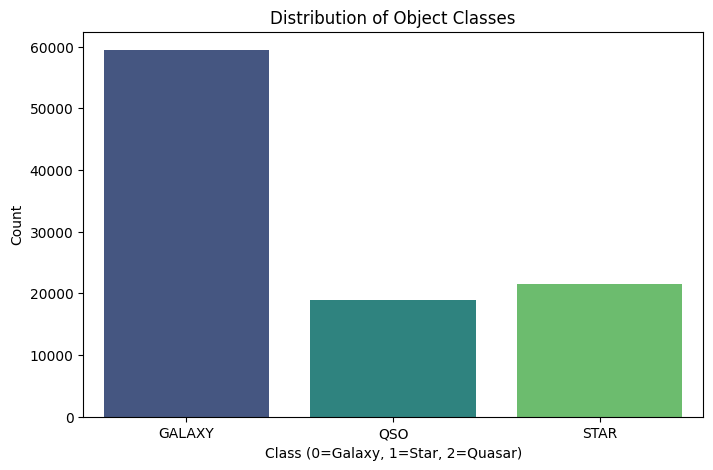

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['class'], palette="viridis")
plt.title("Distribution of Object Classes")
plt.xlabel("Class (0=Galaxy, 1=Star, 2=Quasar)")
plt.ylabel("Count")
plt.show()

# Feature Distributions

Bar plot of object counts (stars, galaxies, quasars)
Check if the classes are balanced

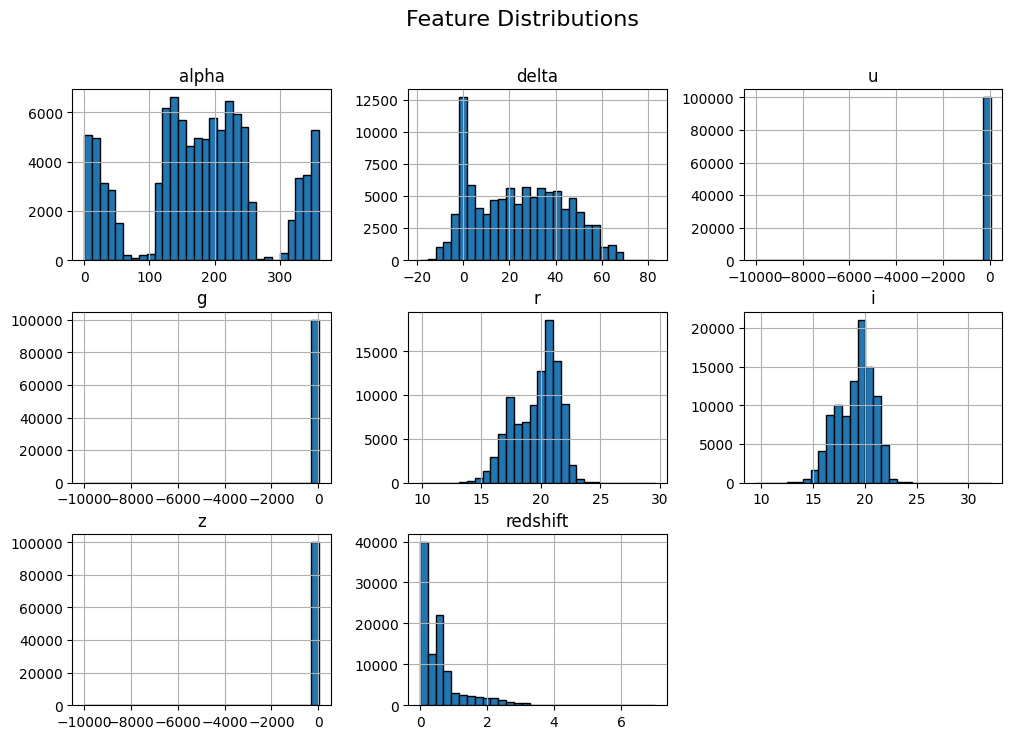

In [11]:
num_features = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']
df[num_features].hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

KDE Plots

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

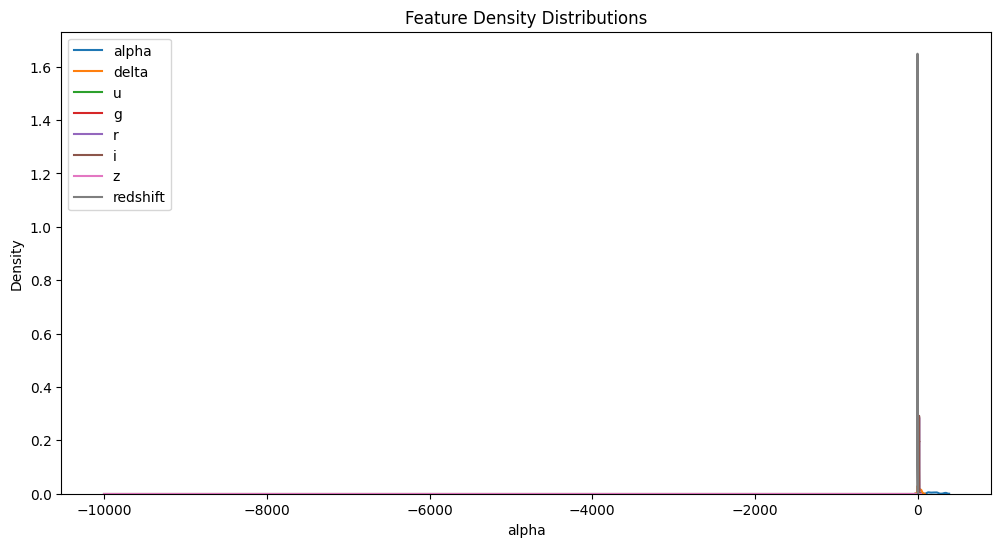

In [12]:
plt.figure(figsize=(12,6))
for col in num_features:
    sns.kdeplot(df[col], label=col)
plt.legend()
plt.title("Feature Density Distributions")
plt.show()

# Correlation Matrix

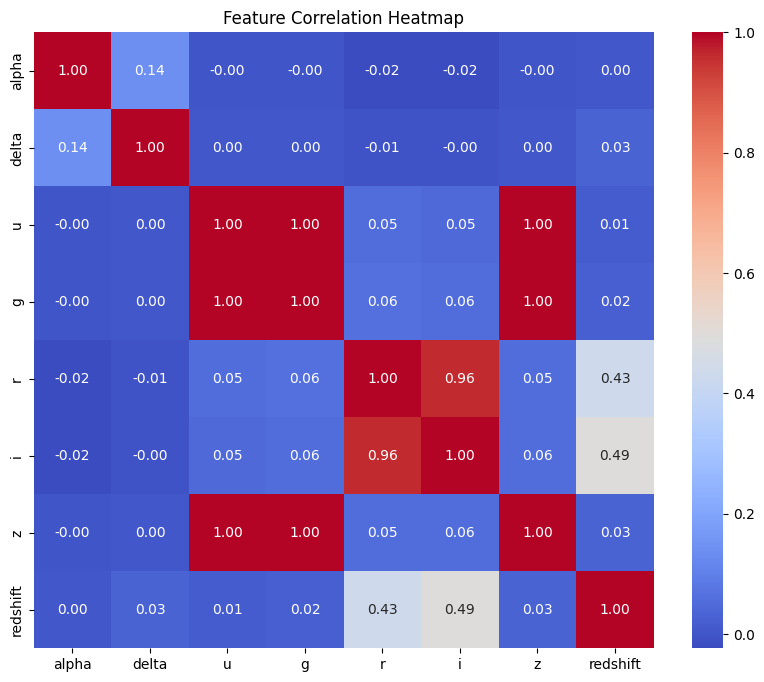

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


# Feature vs Target Analysis

Relationship Between Features and Target

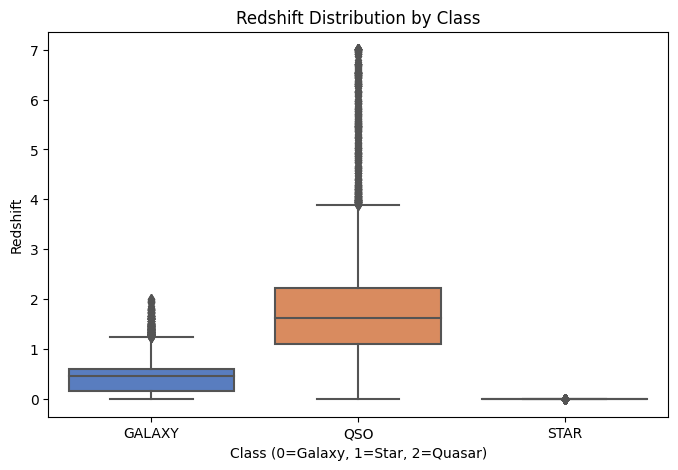

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['class'], y=df['redshift'], palette="muted")
plt.title("Redshift Distribution by Class")
plt.xlabel("Class (0=Galaxy, 1=Star, 2=Quasar)")
plt.ylabel("Redshift")
plt.show()

#  Feature Engineering

Drop unnecessary ID columns

In [15]:
df = df.drop(columns=["obj_ID", "spec_obj_ID", "run_ID", "rerun_ID", "cam_col", "field_ID", "plate", "MJD", "fiber_ID"])

Encode the target variable

In [16]:
label_encoder = LabelEncoder()
df["class"] = label_encoder.fit_transform(df["class"])

Create color index features (Magnitude differences)

In [17]:
df["u-g"] = df["u"] - df["g"]
df["g-r"] = df["g"] - df["r"]
df["r-i"] = df["r"] - df["i"]
df["i-z"] = df["i"] - df["z"]

Log Transformation for redshift (reduce skewness)

In [18]:
df["log_redshift"] = np.log1p(df["redshift"])  # log(1 + redshift) to avoid log(0)

Drop original redshift column (since we now use log_redshift)

In [19]:
df = df.drop(columns=["redshift"])

Split features and target

In [20]:
X = df.drop(columns=["class"])
y = df["class"]

Scale numerical features

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Train-test split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# As a first approach, a Random Forest Classifier

In [23]:
# Initial Model - Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.98
Confusion Matrix:
 [[11741   111    37]
 [  250  3542     0]
 [    2     0  4317]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     11889
           1       0.97      0.93      0.95      3792
           2       0.99      1.00      1.00      4319

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.98     20000
weighted avg       0.98      0.98      0.98     20000



Random Forest Accuracy: 0.9788
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     11889
           1       0.97      0.93      0.95      3792
           2       0.99      1.00      1.00      4319

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.98     20000
weighted avg       0.98      0.98      0.98     20000



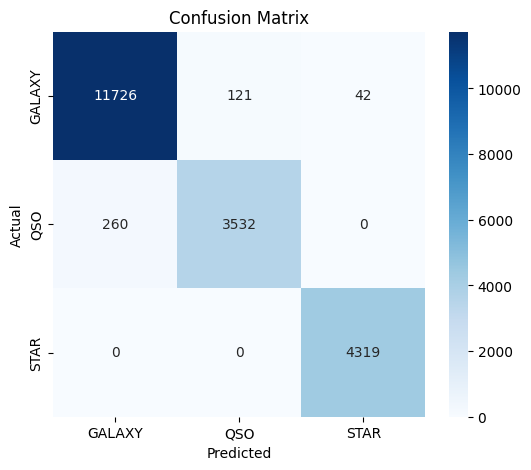

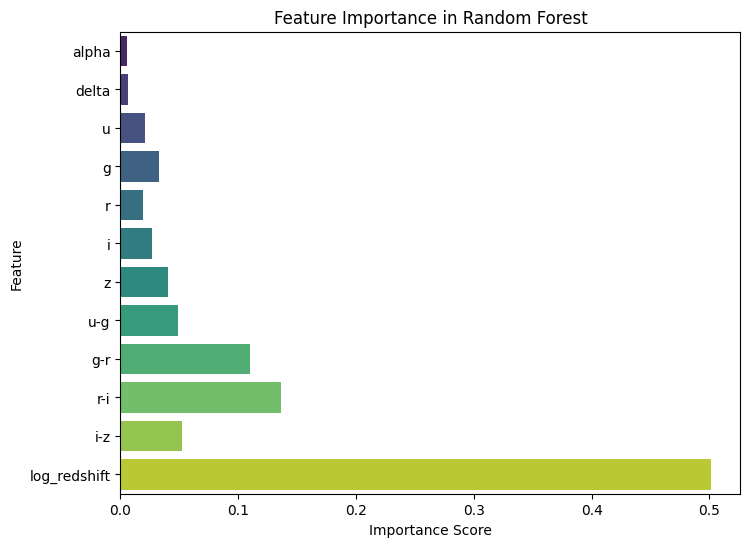

In [24]:


# Load your dataset
#df= pd.read_csv("/kaggle/input/stellar-classification-dataset-sdss17/star_classification.csv")

# 🚀 **1. Drop unnecessary ID columns**
#df = df.drop(columns=["obj_ID", "spec_obj_ID", "run_ID", "rerun_ID", "cam_col", "field_ID", "plate", "MJD", "fiber_ID"])

# 🚀 **2. Encode the target variable**
#label_encoder = LabelEncoder()
#df["class"] = label_encoder.fit_transform(df["class"])  # 0=Galaxy, 1=Star, 2=QSO

# 🚀 **3. Feature Engineering: Adding New Features**
# 3.1. Create color index features (Magnitude differences)
#df["u-g"] = df["u"] - df["g"]
#df["g-r"] = df["g"] - df["r"]
#df["r-i"] = df["r"] - df["i"]
#df["i-z"] = df["i"] - df["z"]

# 3.2. Log Transformation for redshift (reduce skewness)
#df["log_redshift"] = np.log1p(df["redshift"])  # log(1 + redshift) to avoid log(0)

# 3.3. Spatial Features - Convert Right Ascension (RA) & Declination (DEC) into sin/cos
#df["ra_sin"] = np.sin(np.radians(df["alpha"]))
#df["ra_cos"] = np.cos(np.radians(df["alpha"]))
#df["dec_sin"] = np.sin(np.radians(df["delta"]))
#df["dec_cos"] = np.cos(np.radians(df["delta"]))

# 🚀 **4. Drop original redshift column (since we now use log_redshift)**
#df = df.drop(columns=["redshift"])

# 🚀 **5. Split features and target**
#X = df.drop(columns=["class"])
#y = df["class"]

# 🚀 **6. Scale numerical features**
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# 🚀 **7. Train-test split**
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 🚀 **8. Train Random Forest Model**
rf = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)
rf.fit(X_train, y_train)

# 🚀 **9. Make Predictions & Evaluate Model**
y_pred = rf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# 🚀 **10. Confusion Matrix Visualization**
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 🚀 **11. Feature Importance Analysis**
feature_importances = rf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=feature_names, palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest")
plt.show()
